In [1]:
#On my computer imageio and duration 1 for gif, on laboratories imageio.v2 and duration 1000
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import time
try:
    import imageio.v2 as imageio
except:
    import imageio
import os
from scipy.integrate import odeint
random.seed(10)

In [2]:
# Graphs from previous lists, small enhancements

#There will be Erdos-Renyi model, for graph with fixed number of links L between N nodes 
def Ernyi(N=20, L=20):
    if(L>N*(N-1)/2):
        raise ValueError ("To many edges!") # of course we cannot create matrix of 3 nodes with 4 edges
    G = nx.Graph()
    G.add_nodes_from([i for i in range(N)]) #so we can start from 1
    iterator = 0
    while(iterator<L):
        [i,j] = random.sample(list(G.nodes), 2) #we take two nodes
        if not((i, j) in G.edges):
            G.add_edge(i, j) #we add
        else: #to maintain proper number of links
            iterator = iterator-1 
        iterator = iterator + 1
    
    return G

#N is number of nodes, k is number of closest neighbours and p is probability that we change edge in single step
def Watatz(N=20, k=4, p=1):
    if(k%2==1):
        raise ValueError ("Need even number of closest neighbours!")
    
    #creates starting graph//do not move
    G = nx.Graph()
    G.add_nodes_from([i for i in range(N)])
    for i in G.nodes:
        for ki in range(int(k/2)):
            G.add_edges_from([((i+N-1-ki)%N,i), ((i+N+1+ki)%N,i)]) #calculations so N-1 is connected with 0
    
    #changes link for each
    new_G = nx.Graph()
    new_G.add_nodes_from(list(G.nodes))
    iterator = 0

    for link in G.edges:
        #relinking
        if(random.random()<p): #if we succeed in relinking
            new_link = link #for now it is as before
            if(random.random()<0.5): #whether relink node 1 or 2 from edge
                #we do not want link that already was in network, not that we have in currently created one
                while(new_link in list(G.edges)[iterator:] or new_link in new_G.edges):
                    for_choice = list(G.nodes)
                    for_choice.remove(new_link[0])
                    relink = random.choice(for_choice)
                    new_link = (new_link[0], relink)
                new_G.add_edge(new_link[0], new_link[1])
            else: #same procedure, but we change second end of edge
                while(new_link in list(G.edges)[iterator:] or new_link in new_G.edges):
                    for_choice = list(G.nodes)
                    for_choice.remove(new_link[1])
                    relink = random.choice(for_choice)
                    new_link = (relink, new_link[1])
                new_G.add_edge(new_link[0], new_link[1])
        else: #we simply add link that existed in starting network
            new_G.add_edge(link[0], link[1])
        iterator = iterator+1
        
    #new_G.add_nodes_from(list(G.nodes)) #in case some node got totally unconnected
    
    return new_G

''' we start with m0 nodes and in each step we add node connected to m<m0 previous nodes until we reach N nodes
    after t steps we should have N=m0+t nodes and E=m0+mt edges
'''
def Barabasi(m0, m, t):
    '''creating, start from 1 to be similar with previous ones
        we want to start with m0 nodes, m0 edges and each link connected,
        so I just start with triangle, then add new linked nodes'''
    
    G = nx.Graph()
    G.add_edges_from([(0,1), (0,2), (1,2)])
    for i in range(2,m0): 
        G.add_edge(i, random.choice(list(G.nodes)))
        
    #now we add new nodes, choose m distinct edges coming from new node
    for tau in range(t):
        pi = [nx.degree(G, nody)/(sum([nx.degree(G, n) for n in G.nodes])) for nody in G.nodes] #probability for each node
        choice_list =  np.random.choice(list(G.nodes), m, p=pi, replace=False) #choose randomly with no repetinions
        
        for link in choice_list:
            G.add_edge(link, tau+m0)
         #in case we do not link it to any node
      
    return G

# Task 1

## Post lecture wisdom

In [ ]:
#Like in the lecture I will use odeint

In [29]:
def SIR_diff(u,t):
    S = u[0]
    I = u[1]
    R = u[2]  
    return np.array([-beta*I*S,beta*I*S-r_rate*I,r_rate*I]) 

In [66]:
n_I = 1
n_S = 100
n_R = 0
init = [n_S,n_I, n_R]
#b_vals = [0.0025,0.005,0.01] #beta*N = [0.25, 0.5, 1]
#r_vals = [0.3, 0.6, 0.9] 
t = np.linspace(0,100,1000)

In [77]:
def sir_plot(t, lims, ylims=[-5,105]):
    fig, ax = plt.subplots(1, 1,figsize=(10,5))

    u = odeint(SIR_diff, init, t)
    ax.plot(t,u[:,0],label="$S$")   
    ax.plot(t,u[:,1],label="$I$")   
    ax.plot(t,u[:,2],label="$R$")
    ax.set_title(r"$\beta = $"+str(beta)+r"$,r = $"+str(r_rate),fontsize=16)
    ax.set_xlabel(r"$t$",fontsize=16)
    ax.set_ylabel(r"$S/I/R$",fontsize=16)
    ax.legend(loc=5,fontsize=12)
    ax.set_xlim(lims)
    ax.set_ylim(ylims)
    plt.tight_layout()    
    plt.show()

#### We will choose different $\beta, R_0$ for population of 100 susceptible and 1 infected

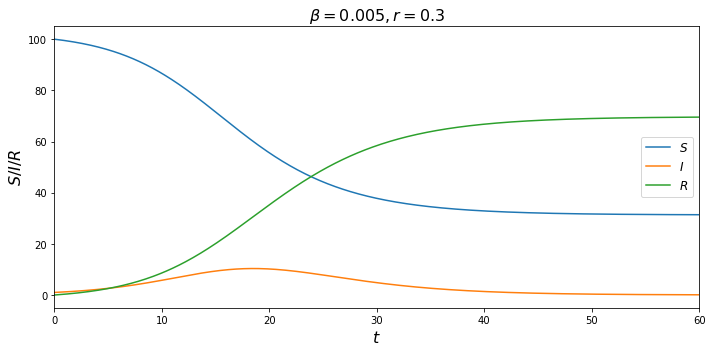

In [78]:
beta = 0.005
r_rate = 0.3
sir_plot(t, [0,60])

$R_0=\frac{0.005 \times 100}{0.3}=1\frac{2}{3}>1$ so as we excpected there was pandemic.

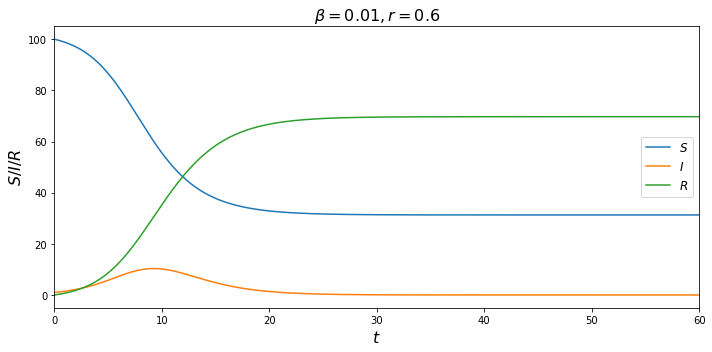

In [79]:
beta = 0.01
r_rate = 0.6
sir_plot(t, [0,60])

$R_0=\frac{0.01 \times 100}{0.6}=1\frac{2}{3}>1$. $R_0$ is the same as before, but infectious and recovery rates are higher and we can see that epidemic occurs faster, also lasts shorter

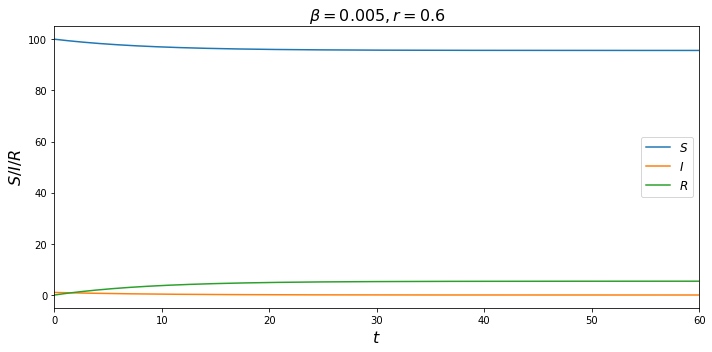

In [70]:
beta = 0.005
r_rate = 0.6
sir_plot(t, [0,60])

$R_0=\frac{0.005 \times 100}{0.6}=\frac{5}{6}<1$. There are few cases, but for $R_0$ smaller that 1 we have no epidemic

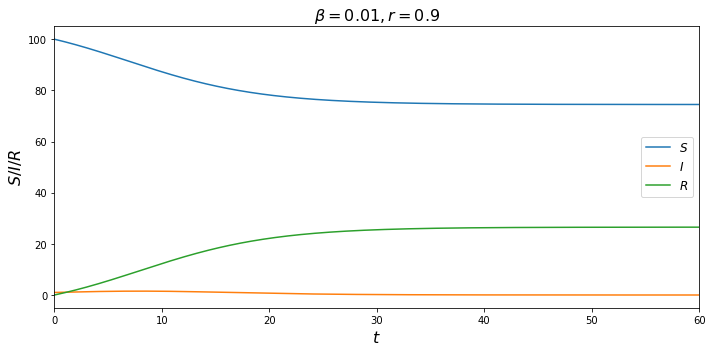

In [83]:
beta = 0.01
r_rate = 0.9
sir_plot(t, [0,60])

$R_0=\frac{0.01 \times 100}{0.9}=1\frac{1}{9}>1$. $R_0$ tells us there should be epidemic, but it doesn't look like this

### b) phase portrait

In [81]:
def quiver_func(u):
    S = u[0]
    I = u[1]  
    return np.array([-beta*I*S,beta*I*S-r_rate*I]) 

In [93]:
beta = 0.0005
r_rate = 0.5
S_values = np.arange(1,1001, 20)
I_values = np.arange(1,21, 1)
t=0

In [94]:
X1,Y1 = np.meshgrid(S_values, I_values)

In [95]:
U1,V1 = quiver_func([X1,Y1])

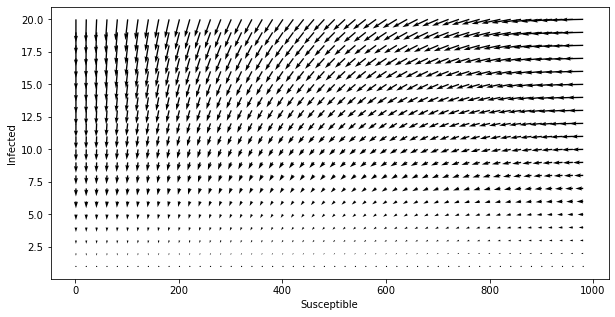

In [96]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.quiver(X1, Y1, U1, V1)
ax.set_xlabel('Susceptible')
ax.set_ylabel('Infected');

We can see that everything is coming into point (0,0) 

### c) 

Plot a total number of infections as a function of $R_0$

In [52]:
n_I = 1.0
n_S = 99.0
n_R = 0
init = [n_S,n_I, n_R]

b_vals = np.linspace(0.001, 0.009, 9)
r_vals = np.linspace(0.1, 0.9, 9)
t = np.linspace(0,100,1000)

In [53]:
#total infected will be currently infected + recovered
R_0s = []
total_infected = []
for i in range(len(b_vals)):
    beta = b_vals[i]
    for j in range(len(r_vals)):
        r_rate = r_vals[j]
        u = odeint(SIR_diff, init, t)
        R_0s.append(beta*n_S/r_rate)
        total_infected.append(u[-1,2]+u[-1,1])

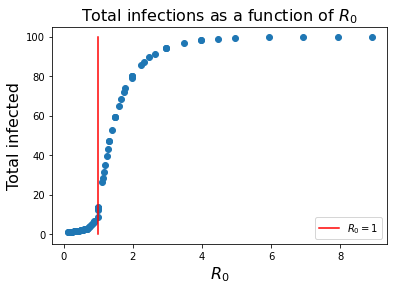

In [57]:
plt.scatter(R_0s, total_infected)
plt.title(r'Total infections as a function of $R_0$',fontsize=16)
plt.plot([1,1], [0,100], 'r', label=r'$R_0=1$')
plt.ylabel('Total infected',fontsize=16)
plt.legend()
plt.xlabel(r'$R_0$',fontsize=16);

We can see that bigger $R_0$, more infections occur, also near $R_0=1$ number of infections rapidly rises.

# Task 2

### a)

In [6]:
#już działa
def p_walk(G, p=0.5):
    '''For a graph G starts from a random node SIR model
    returns how much infected we have in each step
    '''
    nodes = list(G.nodes())
    
    #0 - INFECTED, 1 - SUSCEPTIBLE, -1 - RECOVERED (hence product equal 0 means no infections)
    node_status = np.array([1 for _ in nodes]) #statuses of all nodes, at start all are susceptible
    p0 = random.choice(nodes) #patient 0  
    node_status[nodes.index(p0)] = 0 
    
    infection_progress = []
    infection_progress.append(np.mean(node_status==0)) #we start checking fraction of infected
    
    while(np.prod(node_status)==0): #while anyone is infected
        
        future_status = node_status.copy() #copy(), because just '=' will create only shallow copy
        for node in nodes:
            node_index = nodes.index(node) #we use indexes of nodes, because 2dLattice has tuples instead of integers
            if node_status[node_index]== 0:
                future_status[node_index] = -1
                for n in G.neighbors(node):
                    neigh_index = nodes.index(n)
                    if(node_status[neigh_index] == 1 and random.random()<p):
                        future_status[neigh_index] = 0

        node_status = future_status.copy() #updating our statuses
        infection_progress.append(np.mean(node_status==0)) #updates fraction of infected

    return infection_progress 

In [7]:
# Around 200-300 edges in networks
G_r = Ernyi(100, 300) 
G_w = Watatz(100, 4, 0.5)
G_b = Barabasi(3, 3, 97)
G_l = nx.grid_2d_graph(10, 10)

In [39]:
len(G_r.edges())

300

0.9


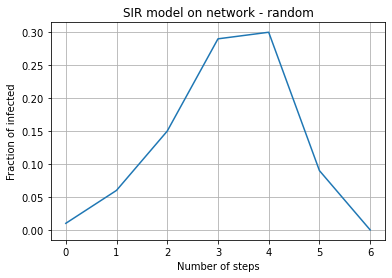

In [8]:
t = p_walk(G_r, 0.5)
plt.plot(t)
plt.ylabel('Fraction of infected')
plt.xlabel('Number of steps')
plt.title('SIR model on network - random')
print(sum(t))
plt.grid()

0.7800000000000001


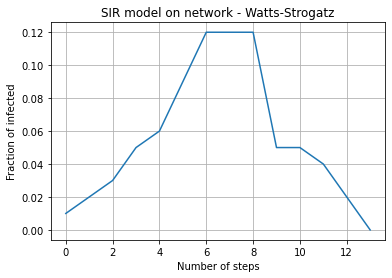

In [35]:
t = p_walk(G_w, 0.5)
plt.plot(t)
plt.ylabel('Fraction of infected')
plt.xlabel('Number of steps')
plt.title('SIR model on network - Watts-Strogatz')
print(sum(t))
plt.grid()

0.9600000000000001


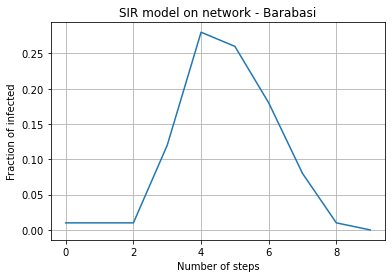

In [36]:
t = p_walk(G_b, 0.5)
plt.plot(t)
plt.ylabel('Fraction of infected')
plt.xlabel('Number of steps')
plt.title('SIR model on network - Barabasi')
print(sum(t))
plt.grid()

0.17


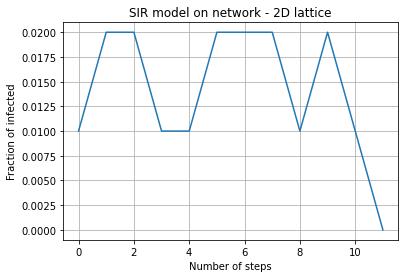

In [38]:
t = p_walk(G_l, 0.5)
plt.plot(t)
plt.ylabel('Fraction of infected')
plt.xlabel('Number of steps')
plt.title('SIR model on network - 2D lattice')
print(sum(t))
plt.grid()

In this case, sum of infected_progress is equal to % of total infected, as in each step we visit every node and infection lasts 1 step and cannot repeat on patients. 

From plots, we can see that now first 3 cases has peak, then proceed to lower down and 2d lattice has some jumps and also takes longer time to get rid of infection (Watts-Strogatz also takes a bit more time that left 2 graphs). 

In random and Barabasi graphs, peaks are much higher than we have it for Watts-Strogatz or 2D lattice.

Of course these were single simulations, so in next step we will simulate more, to obtain something more reliable.

### b) for 3 different p plot mean fraction of infected

In [11]:
def SIR_walk(G, starting_node, p=0.5):
    '''Similar as previous function, but we start from given node, not random
    '''
    nodes = list(G.nodes())
    
    #0 - INFECTED, 1 - SUSCEPTIBLE, -1 - RECOVERED (hence product equal 0 means no infections)
    node_status = np.array([1 for _ in nodes]) #all susceptible
    node_status[nodes.index(starting_node)] = 0 
    
    infection_progress = []
    infection_progress.append(np.mean(node_status==0)) #we start checking fraction of infected
    
    while(np.prod(node_status)==0):
        future_status = node_status.copy() #copy(), because just '=' will create only shallow copy
        for node in nodes:
            node_index = nodes.index(node)
            if node_status[node_index]== 0:
                future_status[node_index] = -1
                for n in G.neighbors(node):
                    neigh_index = nodes.index(n)
                    if(node_status[neigh_index] == 1 and random.random()<p):
                        future_status[neigh_index] = 0
                        
        node_status = future_status.copy()
        infection_progress.append(np.mean(node_status==0))
            
    return infection_progress 

In [103]:
def my_counter(t_list):
    '''returns mean of lists differing in number of columns
    '''
    #columns may differ in length, so I want to sum up them
    my_len = len(t_list)
    
    current_max = 0 
    for run in t_list:
        current_max = max(current_max, len(run))
    for i in range(my_len):
        t_list[i].extend(np.zeros(current_max-len(t_list[i])))
    
    time_sets = np.zeros(current_max)
    for i in range(current_max):
        for j in range(my_len):
            time_sets[i]+=t_list[j][i]
    return time_sets/my_len

In [13]:
p1 = 0.2
p2 = 0.4
p3 = 0.6
start_node = 2

#### p1 = 0.2

In [39]:
r_p1 = []
for i in range(1000):
    r_p1.append(SIR_walk(G_r, start_node, p1))
    
w_p1 = []
for i in range(1000):
    w_p1.append(SIR_walk(G_w, start_node, p1))
    
b_p1 = []
for i in range(1000):
    b_p1.append(SIR_walk(G_b, start_node, p1))
    
l_p1 = []
for i in range(1000):
    l_p1.append(SIR_walk(G_l, (2,2), p1))

In [40]:
r_t1 = my_counter(r_p1)
w_t1 = my_counter(w_p1)
b_t1 = my_counter(b_p1)
l_t1 = my_counter(l_p1)

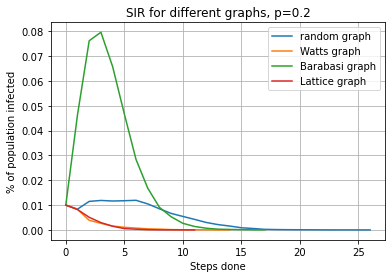

In [41]:
plt.plot(r_t1, label='random graph')
plt.plot(w_t1, label='Watts graph')
plt.plot(b_t1, label='Barabasi graph')
plt.plot(l_t1, label='Lattice graph')
plt.title('SIR for different graphs, p=0.2')
plt.ylabel('% of population infected')
plt.xlabel('Steps done')
plt.legend()
plt.grid()

Here we can see that infection isnt big, except maybe for Barabasi graph, where peak is much higher, as starting nodes has probably many neighbours so many of them gets infected, but the it also quickly dies. (Before I had random graph with 500 edges, then it also has big peak as Barabasi).

#### p2 = 0.4

In [42]:
r_p2 = []
for i in range(1000):
    r_p2.append(SIR_walk(G_r, start_node, p2))
    
w_p2 = []
for i in range(1000):
    w_p2.append(SIR_walk(G_w, start_node, p2))
    
b_p2 = []
for i in range(1000):
    b_p2.append(SIR_walk(G_b, start_node, p2))
    
l_p2 = []
for i in range(1000):
    l_p2.append(SIR_walk(G_l, (2,2), p2))
    
r_t2 = my_counter(r_p2)
w_t2 = my_counter(w_p2)
b_t2 = my_counter(b_p2)
l_t2 = my_counter(l_p2)

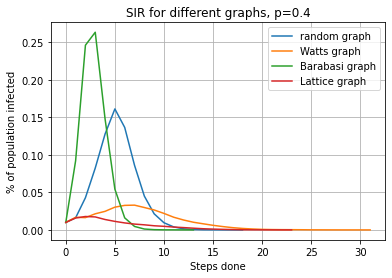

In [43]:
plt.plot(r_t2, label='random graph')
plt.plot(w_t2, label='Watts graph')
plt.plot(b_t2, label='Barabasi graph')
plt.plot(l_t2, label='Lattice graph')
plt.title('SIR for different graphs, p=0.4')
plt.ylabel('% of population infected')
plt.xlabel('Steps done')
plt.legend()
plt.grid()

Again we see Barabsi having the biggest peak, rest 3 lower, but random graph is getting closer, as we had it in a). Also peak of random and Watts-Strogatz graphs is later in time then it is for Barabasi.

#### p3 = 0.6

In [44]:
r_p3 = []
for i in range(1000):
    r_p3.append(SIR_walk(G_r, start_node, p3))
    
w_p3 = []
for i in range(1000):
    w_p3.append(SIR_walk(G_w, start_node, p3))
    
b_p3 = []
for i in range(1000):
    b_p3.append(SIR_walk(G_b, start_node, p3))
    
l_p3 = []
for i in range(1000):
    l_p3.append(SIR_walk(G_l, (2,2), p3))
    
r_t3 = my_counter(r_p3)
w_t3 = my_counter(w_p3)
b_t3 = my_counter(b_p3)
l_t3 = my_counter(l_p3)

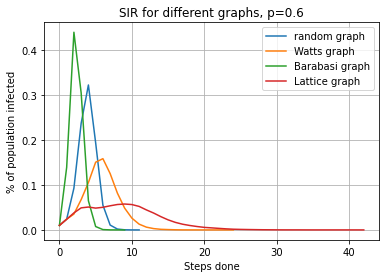

In [45]:
plt.plot(r_t3, label='random graph')
plt.plot(w_t3, label='Watts graph')
plt.plot(b_t3, label='Barabasi graph')
plt.plot(l_t3, label='Lattice graph')
plt.title('SIR for different graphs, p=0.6')
plt.ylabel('% of population infected')
plt.xlabel('Steps done')
plt.legend()
plt.grid()

As in the previous case, maybe growth of Watts-Strogatz graph is easier to notice. We can see that 2D lattice graph has much longer time to overwhelm infection, as it is slower traveling through whole network, from one corner to another.

#### p4 = 0.7 also some not popular node for Barabasi, as 2 is starting node so it has big degree

In [49]:
p4 = 0.7

In [47]:
r_p4 = []
for i in range(1000):
    r_p4.append(SIR_walk(G_r, 78, p4))
    
w_p4 = []
for i in range(1000):
    w_p4.append(SIR_walk(G_w, 78, p4))
    
b_p4 = []
for i in range(1000):
    b_p4.append(SIR_walk(G_b, 78, p4))
    
l_p4 = []
for i in range(1000):
    l_p4.append(SIR_walk(G_l, (7,8), p4))
    
r_t4 = my_counter(r_p4)
w_t4 = my_counter(w_p4)
b_t4 = my_counter(b_p4)
l_t4 = my_counter(l_p4)

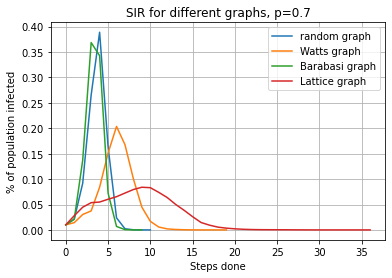

In [48]:
plt.plot(r_t4, label='random graph')
plt.plot(w_t4, label='Watts graph')
plt.plot(b_t4, label='Barabasi graph')
plt.plot(l_t4, label='Lattice graph')
plt.title('SIR for different graphs, p=0.7')
plt.ylabel('% of population infected')
plt.xlabel('Steps done')
plt.legend()
plt.grid()

We can see that Barabasi case is postponed in time, but often it soon infects one of the most popular nodes and then again they infect the rest of population. Also here random graph is mostly on par with Barabsi

### c) 

Functions behave similar to ODE with $R_0>1$, yet they are not that smooth. Lattice maybe is a bit different, as it is really flat and last longer

### d) 20 different p, from random start

In [22]:
#QUESTION: 
def p_walk_but_different(G, p=0.5):
    '''SIR model with starting from random node
        returns how long it took to end phandemic and fraction of people that were infected
    '''
    nodes = list(G.nodes())
    
    #0 - INFECTED, 1 - SUSCEPTIBLE, -1 - RECOVERED (hence product equal 0 means no infections)
    
    node_status = np.array([1 for _ in nodes]) #all susceptible
    p0 = random.choice(nodes) #patient 0  
    node_status[nodes.index(p0)] = 0 
    
    infection_progress = []
    infection_progress.append(np.mean(node_status==0)) #we start checking fraction of infected
    
    steps = 0
    while(np.prod(node_status)==0):
        steps+=1
        future_status = node_status.copy() #copy(), because just '=' will create only shallow copy
        for node in nodes:
            node_index = nodes.index(node)
            if node_status[node_index]== 0:
                future_status[node_index] = -1
                for n in G.neighbors(node):
                    neigh_index = nodes.index(n)
                    if(node_status[neigh_index] == 1 and random.random()<p):
                        future_status[neigh_index] = 0
                        

        node_status = future_status.copy()
        infection_progress.append(np.mean(node_status==0))
    
    return steps, sum(infection_progress), infection_progress

In [23]:
ps = np.linspace(0.05, 0.95, 20) #20 different values of p
MC_step=1000

In [24]:
def d_point(G, ps, MC_step=1000):
    '''This function does Monte Carlo simulations for graph G, range of different p 'ps' MC_step times
    return mean value of time and sum of infected for each value of p
    '''
    sum_infected = []
    time_curation = []
    step_needed = []
    for p_single in ps:
        si = 0 #sum_infected
        st = 0 #sum_time
        ss = 0 #sum_steps
        for i in range(MC_step):
            t1,s1, n1 = p_walk_but_different(G, p_single)
            si+=s1
            st+=t1
            ss += n1.index(max(n1))
        sum_infected.append(si/MC_step)
        time_curation.append(st/MC_step)
        step_needed.append(ss/MC_step)
    return time_curation, sum_infected, step_needed

In [25]:
drt, drs, drn = d_point(G_r, ps, 1000)
dwt, dws, dwn = d_point(G_w, ps, 1000)
dbt, dbs, dbn = d_point(G_b, ps, 1000)
dlt, dls, dln = d_point(G_l, ps, 1000)

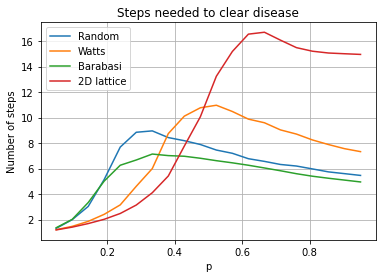

In [27]:
plt.plot(ps, drt, label='Random')
plt.plot(ps, dwt, label='Watts')
plt.plot(ps, dbt, label='Barabasi')
plt.plot(ps, dlt, label='2D lattice')
plt.title('Steps needed to clear disease')
plt.ylabel('Number of steps')
plt.xlabel('p')
plt.legend()
plt.grid();

As we can see, each graph has some value of that creates the longest infection time, when infection neither dies itself due to low infection rate, nor 'claims' everyone infected in fast rate. For lattice graph peak is around p=0.6 and even for higher p infection still takes time, as it need to travel whole network

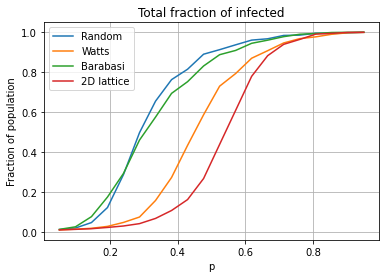

In [58]:
plt.plot(ps, drs, label='Random')
plt.plot(ps, dws, label='Watts')
plt.plot(ps, dbs, label='Barabasi')
plt.plot(ps, dls, label='2D lattice')
plt.title('Total fraction of infected')
plt.ylabel('Fraction of population')
plt.xlabel('p')
plt.legend()
plt.grid();

We can see that in each graph fraction of all infected goes to 1 as p grows, Barabasi and random graph being quite close to each other, while for lattice graph even for higher p it happens that there are many susceptible left in network

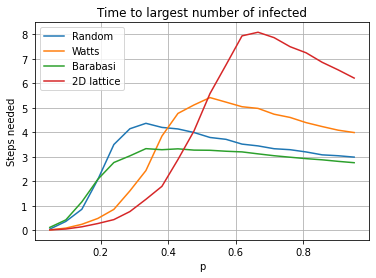

In [26]:
plt.plot(ps, drn, label='Random')
plt.plot(ps, dwn, label='Watts')
plt.plot(ps, dbn, label='Barabasi')
plt.plot(ps, dln, label='2D lattice')
plt.title('Time to largest number of infected')
plt.ylabel('Steps needed')
plt.xlabel('p')
plt.legend()
plt.grid();

We can see that shape of these plots is similar to plots of total number of steps needed to cure infection, but it around 2 times smaller. Looks like time needed to get the largest number of infected is around middle of whole infection. Also here, for lattice graph, for higher values of p, number of steps needed is getting shorter in faster way, than steps needed to cure infection. 

### e) What each of the above measures tells you about the different networks?

In more connected or more randomly connected graph infection proceeds faster. Of course if we have small number of edges, maximum of 4 for lattice graph, for small p there is high chance that infection dies faster. For smaller chance of getting infected, when there are no hops from one corner of network to another, time of curring whole network take often longer.

### f) animation for each graph of 30 nodes

In [97]:
def gif_walk(G, p=0.5, name_movie='Movie'):
    '''For a graph G starts from a random node SIR model
    creates gif of infection
    '''
    
    #blue - susceptible : 1
    #red - infected : 0
    #green - recovered : -1
    
    nodes = list(G.nodes())
    
    #0 - INFECTED, 1 - SUSCEPTIBLE, -1 - RECOVERED (hence product equal 0 means no infections)
    
    node_status = np.array([1 for _ in nodes]) #all susceptible
    p0 = random.choice(nodes) #patient 0  
    node_status[nodes.index(p0)] = 0 
    
    infection_progress = []
    infection_progress.append(np.mean(node_status==0)) #we start checking fraction of infected
    
    color_map = ['blue' for i in range(len(nodes))]
    color_map[nodes.index(p0)] = 'red'
    nx.draw_spectral(G, node_color=color_map)
    
    plt.savefig(f'./task3_{0}.png', transparent = False, facecolor = 'white')
    
    steps_stepped = 0
    while(np.prod(node_status)==0):
        steps_stepped+=1
        
        future_status = node_status.copy() #copy(), because just '=' will create only shallow copy
        for node in nodes:
            node_index = nodes.index(node)
            if node_status[node_index]== 0:
                future_status[node_index] = -1
                color_map[node_index] = 'green'
                for n in G.neighbors(node):
                    neigh_index = nodes.index(n)
                    if(node_status[neigh_index] == 1 and random.random()<p):
                        future_status[neigh_index] = 0
                        color_map[neigh_index] = 'red'
                        

        node_status = future_status.copy()
        #infection_progress.append(np.mean(node_status==0))
        nx.draw_spectral(G, node_color=color_map) #color for plot
        
        plt.savefig(f'./task3_{steps_stepped}.png', transparent = False, facecolor = 'white')
               
    #save frames and delete files
    frames = []
    for t in range(steps_stepped+1):
        frames.append(imageio.imread(f'./task3_{t}.png'))
        os.remove(f'./task3_{t}.png')
        

    imageio.mimsave('./'+name_movie+'.gif', frames, duration=1)
    #imageio.mimsave('./'+name_movie+'.gif', frames, duration=1000) #for miliseconds

First free are just call of function, 2d lattice is in a form of gif

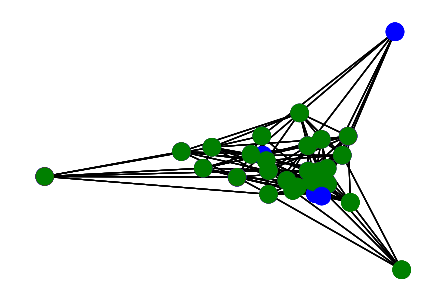

In [52]:
gif_walk(Ernyi(30, 150), 0.2, 'Random_pandemic');

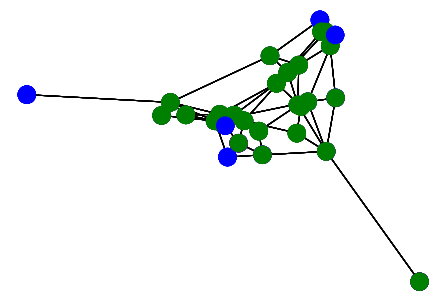

In [12]:
gif_walk(Watatz(30, 4, 0.5), 0.4, 'Watts_pandemic');

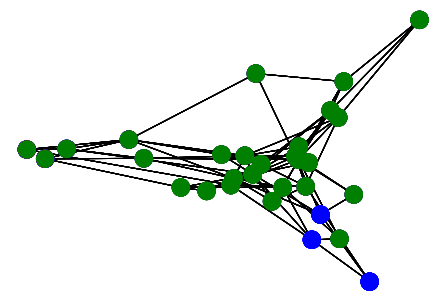

In [13]:
gif_walk(Barabasi(3, 3, 27), 0.5, 'Barabasi_pandemic');

In [99]:
gif_walk(nx.grid_2d_graph(5, 6), 0.5, '2d_pandemic');

<img src="2d_pandemic.gif" width="500" align="center">

## Task 3

In [92]:
def asynchronous_walk(G, p=0.5):
    '''For a graph G starts SIR model,
    in each steps chooses random node and proceeds with SIR things (infect or recover), repeats number of nodes times
    '''
    
    nodes = list(G.nodes())
    
    #0 - INFECTED, 1 - SUSCEPTIBLE, -1 - RECOVERED (hence product equal 0 means no infections)
    
    node_status = np.array([1 for _ in nodes]) #all susceptible
    p0 = random.choice(nodes) #patient 0  
    node_status[nodes.index(p0)] = 0 
    
    infection_progress = []
    infection_progress.append(np.mean(node_status==0)) #we start checking fraction of infected
    
    
    nodes_moved = 0
    while(np.prod(node_status)==0):
        
        future_status = node_status.copy() #copy(), because just '=' will create only shallow copy
        
        for _ in range(len(nodes)):
            node = random.choice(nodes)
            node_index = nodes.index(node)
            if node_status[node_index]== 0:
                
                future_status[node_index] = -1
                for n in G.neighbors(node):
                    n_index = nodes.index(n)
                    if(node_status[n_index] == 1 and random.random()<p):
                        future_status[n_index] = 0
                        

        node_status = future_status.copy()
        infection_progress.append(np.mean(node_status==0))
        
               


    return infection_progress 

### Now I will repeat thigs from taks 2

### a)

1.48


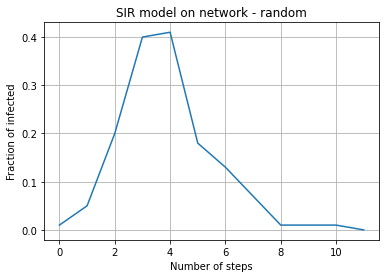

In [93]:
t = asynchronous_walk(G_r, 0.5)
plt.plot(t)
plt.ylabel('Fraction of infected')
plt.xlabel('Number of steps')
plt.title('SIR model on network - random')
print(sum(t))
plt.grid()

Sum of fraction of infected in each step is greater than 1, so we see that sometimes nodes are infected for more that 1 step

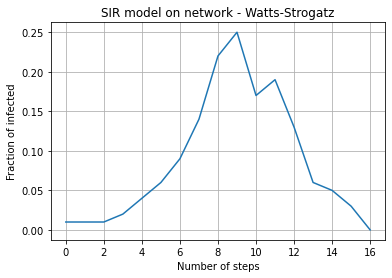

In [94]:
t = asynchronous_walk(G_w, 0.5)
plt.plot(t)
plt.ylabel('Fraction of infected')
plt.xlabel('Number of steps')
plt.title('SIR model on network - Watts-Strogatz')
plt.grid()

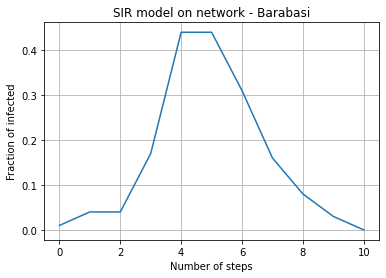

In [95]:
t = asynchronous_walk(G_b, 0.5)
plt.plot(t)
plt.ylabel('Fraction of infected')
plt.xlabel('Number of steps')
plt.title('SIR model on network - Barabasi')
plt.grid()

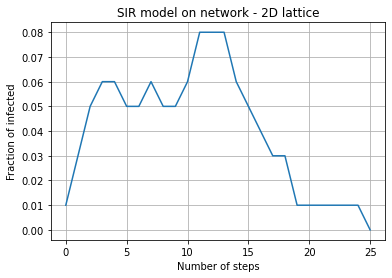

In [96]:
t = asynchronous_walk(G_l, 0.5)
plt.plot(t)
plt.ylabel('Fraction of infected')
plt.xlabel('Number of steps')
plt.title('SIR model on network - 2D lattice')
plt.grid()

Once again we can see that for lattice graph there are some ups and downs, also 2 happened for Watts-Strogatz, but for first one it's more popular. 

### b)

In [97]:
def a_SIR_walk(G, starting_node, p=0.5):
    '''Similar as previous function, but we start from given node
    '''
    
    tim = time.time()
    
    nodes = list(G.nodes())
    
    #0 - INFECTED, 1 - SUSCEPTIBLE, -1 - RECOVERED (hence product equal 0 means no infections)
    
    node_status = np.array([1 for _ in nodes]) #all susceptible
    
    node_status[nodes.index(starting_node)] = 0 
    
    infection_progress = []
    infection_progress.append(np.mean(node_status==0)) #we start checking fraction of infected
    
    
    nodes_moved = 0
    while(np.prod(node_status)==0):
        
        future_status = node_status.copy() #copy(), because just '=' will create only shallow copy
        
        for _ in range(len(nodes)):
            node = random.choice(nodes)
            node_index = nodes.index(node)
            if node_status[node_index]== 0:
                
                future_status[node_index] = -1
                for n in G.neighbors(node):
                    n_index = nodes.index(n)
                    if(node_status[n_index] == 1 and random.random()<p):
                        future_status[n_index] = 0
                        

        node_status = future_status.copy()
        infection_progress.append(np.mean(node_status==0))
        
               

    return infection_progress 

In [104]:
#it is just a repetition, if one wants to just go over task 3, evading 2
def my_counter(t_list):
    '''returns mean of lists differing in number of columns
    '''
    #columns may differ in length, so I want to sum up them
    my_len = len(t_list)
    
    current_max = 0 
    for run in t_list:
        current_max = max(current_max, len(run))
    for i in range(my_len):
        t_list[i].extend(np.zeros(current_max-len(t_list[i])))
    
    time_sets = np.zeros(current_max)
    for i in range(current_max):
        for j in range(my_len):
            time_sets[i]+=t_list[j][i]
    return time_sets/my_len

In [100]:
p1 = 0.2
p2 = 0.4
p3 = 0.5
start_node = 2

##### p1=0.2

In [101]:
r_p1 = []
for i in range(1000):
    r_p1.append(a_SIR_walk(G_r, start_node, p1))
    
w_p1 = []
for i in range(1000):
    w_p1.append(a_SIR_walk(G_w, start_node, p1))
    
b_p1 = []
for i in range(1000):
    b_p1.append(a_SIR_walk(G_b, start_node, p1))
    
l_p1 = []
for i in range(1000):
    l_p1.append(a_SIR_walk(G_l, (2,2), p1))

In [105]:
r_t1 = my_counter(r_p1)
w_t1 = my_counter(w_p1)
b_t1 = my_counter(b_p1)
l_t1 = my_counter(l_p1)

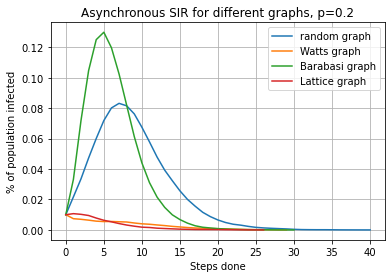

In [106]:
plt.plot(r_t1, label='random graph')
plt.plot(w_t1, label='Watts graph')
plt.plot(b_t1, label='Barabasi graph')
plt.plot(l_t1, label='Lattice graph')
plt.title('Asynchronous SIR for different graphs, p=0.2')
plt.ylabel('% of population infected')
plt.xlabel('Steps done')
plt.legend()
plt.grid()

As in previous case, for small p, lattice and Watts-Strogatz graphs fast go to 0. Barabasi and random have some bigger jump until they begin to fall, Barabasi again highest, there its peak is a bit higher (0.08 in task 2). But in task 2, for low p random graph behaved like the other two graphs, so it's big change

#### p2 = 0.4

In [111]:
r_p2 = []
for i in range(1000):
    r_p2.append(a_SIR_walk(G_r, start_node, p2))
    
w_p2 = []
for i in range(1000):
    w_p2.append(a_SIR_walk(G_w, start_node, p2))
    
b_p2 = []
for i in range(1000):
    b_p2.append(a_SIR_walk(G_b, start_node, p2))
    
l_p2 = []
for i in range(1000):
    l_p2.append(a_SIR_walk(G_l, (2,2), p2))
    
r_t2 = my_counter(r_p2)
w_t2 = my_counter(w_p2)
b_t2 = my_counter(b_p2)
l_t2 = my_counter(l_p2)

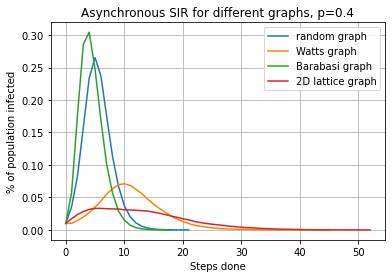

In [112]:
plt.plot(r_t2, label='random graph')
plt.plot(w_t2, label='Watts graph')
plt.plot(b_t2, label='Barabasi graph')
plt.plot(l_t2, label='2D lattice graph')
plt.title('Asynchronous SIR for different graphs, p=0.4')
plt.ylabel('% of population infected')
plt.xlabel('Steps done')
plt.legend()
plt.grid()

So here peak of Barabasi is a bit higher (~30 vs ~25), random is quite higher (~25 vs ~15), Watts-Strogatz and lattice also have more infections. Epidemic lasts longer, also in previous case Watts-Strogatz took longest time to recover, now it's again lattice graph. 

#### p3 = 0.6

In [109]:
r_p3 = []
for i in range(1000):
    r_p3.append(a_SIR_walk(G_r, start_node, p3))
    
w_p3 = []
for i in range(1000):
    w_p3.append(a_SIR_walk(G_w, start_node, p3))
    
b_p3 = []
for i in range(1000):
    b_p3.append(a_SIR_walk(G_b, start_node, p3))
    
l_p3 = []
for i in range(1000):
    l_p3.append(a_SIR_walk(G_l, (2,2), p3))
    
r_t3 = my_counter(r_p3)
w_t3 = my_counter(w_p3)
b_t3 = my_counter(b_p3)
l_t3 = my_counter(l_p3)

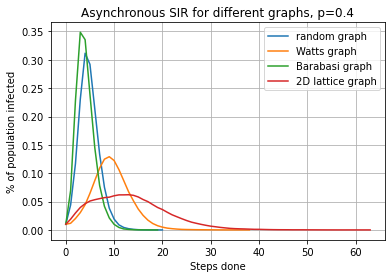

In [110]:
plt.plot(r_t3, label='random graph')
plt.plot(w_t3, label='Watts graph')
plt.plot(b_t3, label='Barabasi graph')
plt.plot(l_t3, label='2D lattice graph')
plt.title('Asynchronous SIR for different graphs, p=0.4')
plt.ylabel('% of population infected')
plt.xlabel('Steps done')
plt.legend()
plt.grid()

Now Barabasi is not that high as before (0.35 vs 0.40+), random graph is closer, Watts-Strogatz graph is lower. Random and lattice have peak in similar position. Graphs seem to have longer period of pandemic now.

### c)

Similar as in previous task, they behave as ODE with $R_0>1$

### d)

In [29]:
#QUESTION: 
def a_walk_but_different(G, p=0.5):
    '''SIR model with starting from random node
        returns how long it took to end phandemic and fraction of people that were infected
    '''
    
    tim = time.time()
    
    nodes = list(G.nodes())
    
    #0 - INFECTED, 1 - SUSCEPTIBLE, -1 - RECOVERED (hence product equal 0 means no infections)
    
    node_status = np.array([1 for _ in nodes]) #all susceptible
    p0 = random.choice(nodes) #patient 0  
    node_status[nodes.index(p0)] = 0 
    
    infection_progress = []
    infection_progress.append(np.mean(node_status==0)) #we start checking fraction of infected
    
    steps = 0
    nodes_moved = 0
    while(np.prod(node_status)==0):
        steps+= 1
        future_status = node_status.copy() #copy(), because just '=' will create only shallow copy
        
        for _ in range(len(nodes)):
            node = random.choice(nodes)
            node_index = nodes.index(node)
            if node_status[node_index]== 0:
                
                future_status[node_index] = -1
                for n in G.neighbors(node):
                    n_index = nodes.index(n)
                    if(node_status[n_index] == 1 and random.random()<p):
                        future_status[n_index] = 0
                        

        node_status = future_status.copy()
        infection_progress.append(np.mean(node_status==0))
        
               
    #print(steps)

    return steps, np.mean(node_status==-1),  infection_progress.index(max(infection_progress)) #now its all that recovered

In [30]:
def a_point(G, ps, MC_step=1000):
    sum_infected = []
    time_curation = []
    steps_needed = []
    for p_single in ps:
        si = 0
        st = 0
        sn = 0
        for i in range(MC_step):
            t1,s1,n1 = a_walk_but_different(G, p_single)
            si+=s1
            st+=t1
            sn+=n1
        sum_infected.append(si/MC_step)
        time_curation.append(st/MC_step)
        steps_needed.append(sn/MC_step)
    return time_curation, sum_infected, steps_needed

In [31]:
ps = np.linspace(0.05, 0.95, 20)
MC_step=1000

In [32]:
drt, drs, drn = a_point(G_r, ps, MC_step)
dwt, dws, dwn = a_point(G_w, ps, MC_step)
dbt, dbs, dbn = a_point(G_b, ps, MC_step)
dlt, dls, dln = a_point(G_l, ps, MC_step)

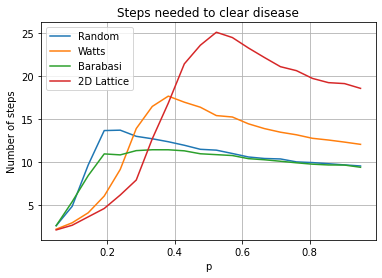

In [117]:
plt.plot(ps, drt, label='Random')
plt.plot(ps, dwt, label='Watts')
plt.plot(ps, dbt, label='Barabasi')
plt.plot(ps, dlt, label='2D Lattice')
plt.title('Steps needed to clear disease')
plt.ylabel('Number of steps')
plt.xlabel('p')
plt.legend()
plt.grid();

Shapes are similar to task 2, but it takes longer time to cure illness. Also, peaks are for smaller values of p. 

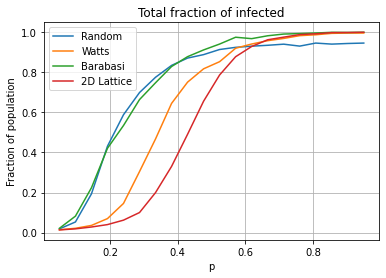

In [118]:
plt.plot(ps, drs, label='Random')
plt.plot(ps, dws, label='Watts')
plt.plot(ps, dbs, label='Barabasi')
plt.plot(ps, dls, label='2D Lattice')
plt.title('Total fraction of infected')
plt.ylabel('Fraction of population')
plt.xlabel('p')
plt.legend()
plt.grid();

Once again, shapes are similar, but moment where these functions change convexity is more smaller value of p. Also, here for random graph, even for big infection rate, happen unit that remained uninfected, as function does not meet value of 1.

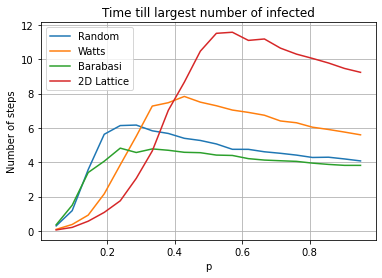

In [33]:
plt.plot(ps, drn, label='Random')
plt.plot(ps, dwn, label='Watts')
plt.plot(ps, dbn, label='Barabasi')
plt.plot(ps, dln, label='2D Lattice')
plt.title('Time till largest number of infected')
plt.ylabel('Number of steps')
plt.xlabel('p')
plt.legend()
plt.grid();

Like in previous case, shapes are similar to time needed to cure infection and are around halved in height.

### f)

In [100]:
def a_gif_walk(G, p=0.5, name_movie='Movie'):
    '''For a graph G starts from a random node SIR model
    creates gif of infection
    '''
    
    #blue - susceptible : 1
    #red - infected : 0
    #green - recovered : -1
    
    nodes = list(G.nodes())
    
    #0 - INFECTED, 1 - SUSCEPTIBLE, -1 - RECOVERED (hence product equal 0 means no infections)
    
    node_status = np.array([1 for _ in nodes]) #all susceptible
    p0 = random.choice(nodes) #patient 0  
    node_status[nodes.index(p0)] = 0 
    
    infection_progress = []
    infection_progress.append(np.mean(node_status==0)) #we start checking fraction of infected
    
    color_map = ['blue' for i in range(len(nodes))]
    color_map[nodes.index(p0)] = 'red'
    nx.draw_spectral(G, node_color=color_map)
    
    plt.savefig(f'./task3_{0}.png', transparent = False, facecolor = 'white')
    
    steps_stepped = 0           
    while(np.prod(node_status)==0):
        steps_stepped+=1
        future_status = node_status.copy() #copy(), because just '=' will create only shallow copy
        
        for _ in range(len(nodes)):
            node = random.choice(nodes)
            node_index = nodes.index(node)
            if node_status[node_index]== 0:
                
                future_status[node_index] = -1
                color_map[node_index] = 'green'
                for n in G.neighbors(node):
                    n_index = nodes.index(n)
                    if(node_status[n_index] == 1 and random.random()<p):
                        future_status[n_index] = 0
                        color_map[n_index] = 'red'
                        

        node_status = future_status.copy()
        #infection_progress.append(np.mean(node_status==0))
        nx.draw_spectral(G, node_color=color_map) #color for plot
        
        plt.savefig(f'./task3_{steps_stepped}.png', transparent = False, facecolor = 'white')
               
    #save frames and delete files
    frames = []
    for t in range(steps_stepped+1):
        frames.append(imageio.imread(f'./task3_{t}.png'))
        os.remove(f'./task3_{t}.png')
        
    
    #imageio.mimsave('./'+name_movie+'.gif', frames, duration=1000)
    imageio.mimsave('./'+name_movie+'.gif', frames, duration=1)

In [102]:
a_gif_walk(nx.grid_2d_graph(5, 6), 0.7, 'a_2d_pandemic');

<img src="a_2d_pandemic.gif" width="500" align="center">

We can see that not in every step nodes infect neighbour, so it works properly

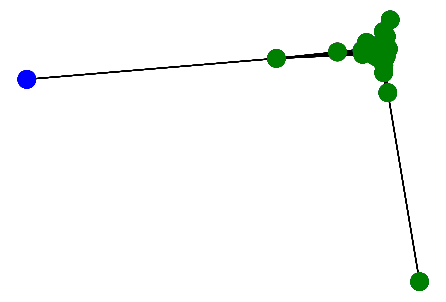

In [123]:
a_gif_walk(Ernyi(100, 300), 0.7, 'a_r_pandemic');

We can also create other graphs